# Note: This project is a part of Udacity's Deep learning nanodegree program. 

### Predicting student admission with Neural Network

Dataset reference: https://stats.idre.ucla.edu/

There are 3 features based
1. GRE scores
2. GPA scores
3. Class rank

Using these three features we need to predict whether the admission of student to graduate school possible or not. 

## Install libraries 

In [19]:
!conda install -c anaconda numpy -y 
!conda install scikit-learn -y
!conda install -c anaconda pandas -y
!conda install -c conda-forge matplotlib -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.9.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/zmp/anaconda3/envs/dlnd

  added / updated specs:
    - numpy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.10.14 |                0         128 KB  anaconda
    certifi-2020.6.20          |           py37_0         159 KB  anaconda
    openssl-1.1.1h             |       h7b6447c_0         3.8 MB  anaconda
    ------------------------------------------------------------
                                           Total:         4.1 MB

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates                                 pkgs/main --> anaconda
  certifi                       

## Import libraries

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

## Loading the dataset

data = pd.read_csv('student_data.csv')

data[:10]

## Visualize the dataset

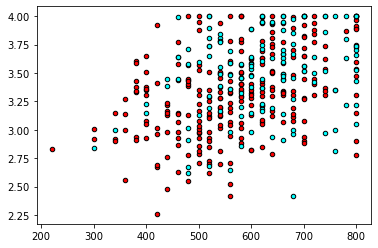

In [4]:
def plot_points(data):
    X = np.array(data[["gre","gpa"]])
    y = np.array(data["admit"])
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    for s in rejected:
        plt.scatter(s[0][0],s[0][1],s=20,color='red',edgecolor='k')
    for s in admitted:
        plt.scatter(s[0][0],s[0][1],s=20,color='cyan',edgecolor='k')
plot_points(data)
plt.show()

### seperating the ranks

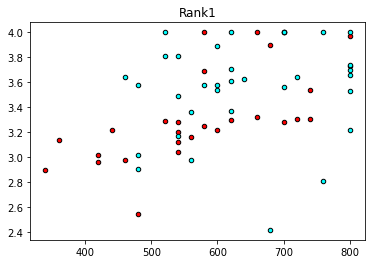

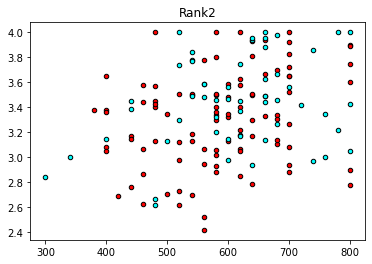

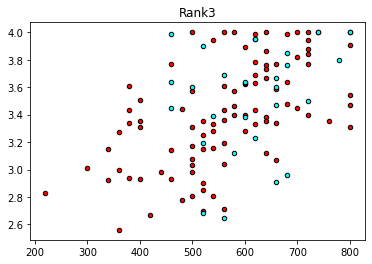

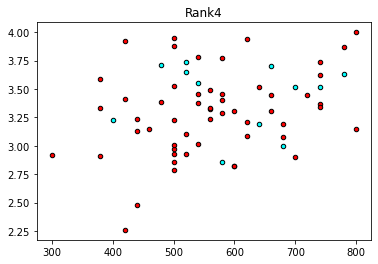

In [5]:
data_rank1=data[data["rank"]==1]
data_rank2=data[data["rank"]==2]
data_rank3=data[data["rank"]==3]
data_rank4=data[data["rank"]==4]

# plotting the graphs
plot_points(data_rank1)
plt.title("Rank1")
plt.show()
plot_points(data_rank2)
plt.title("Rank2")
plt.show()
plot_points(data_rank3)
plt.title("Rank3")
plt.show()
plot_points(data_rank4)
plt.title("Rank4")
plt.show()

###  One hot encoding 

In [7]:
one_hot_data = pd.concat([data,pd.get_dummies(data['rank'],prefix='rank')],axis=1)
one_hot_data = one_hot_data.drop('rank',axis=1)
one_hot_data[:10]

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,380,3.61,0,0,1,0
1,1,660,3.67,0,0,1,0
2,1,800,4.00,1,0,0,0
3,1,640,3.19,0,0,0,1
4,0,520,2.93,0,0,0,1
5,1,760,3.00,0,1,0,0
6,1,560,2.98,1,0,0,0
7,0,400,3.08,0,1,0,0
8,1,540,3.39,0,0,1,0
9,0,700,3.92,0,1,0,0


## Pre-processing 

In [8]:
processed_data = one_hot_data[:]
processed_data['gre'] = processed_data['gre']/800
processed_data['gpa'] = processed_data['gpa']/4.0
processed_data[:10]

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,0.475,0.9025,0,0,1,0
1,1,0.825,0.9175,0,0,1,0
2,1,1.000,1.0000,1,0,0,0
3,1,0.800,0.7975,0,0,0,1
4,0,0.650,0.7325,0,0,0,1
5,1,0.950,0.7500,0,1,0,0
6,1,0.700,0.7450,1,0,0,0
7,0,0.500,0.7700,0,1,0,0
8,1,0.675,0.8475,0,0,1,0
9,0,0.875,0.9800,0,1,0,0


### Split the train and test dataset

In [24]:
X = processed_data.drop('admit',axis=1)
y = processed_data['admit']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

## Traning the 2 layers Neural Network

In [28]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_prime(x):
    return sigmoid(x)*(1-sigmoid(x))

def error_formula(y,output):
    return - y*np.log(output) - (1 - y) * np.log(1-output)

def error_term_formula(x,y,output):
    return (y-output) * sigmoid_prime(x)

In [30]:
# Neural Network hyperparameters
epochs = 1000
learnrate = 0.5

# Training function
def train_nn(features, targets, epochs, learnrate):
    
    # Use to same seed to make debugging easier
    np.random.seed(42)

    n_records, n_features = features.shape
    last_loss = None

    # Initialize weights
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)

    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features.values, targets):
            # Loop through all records, x is the input, y is the target

            # Activation of the output unit
            #   Notice we multiply the inputs and the weights here 
            #   rather than storing h as a separate variable 
            output = sigmoid(np.dot(x, weights))

            # The error, the target minus the network output
            error = error_formula(y, output)

            # The error term
            error_term = error_term_formula(x, y, output)

            # The gradient descent step, the error times the gradient times the inputs
            del_w += error_term * x

        # Update the weights here. The learning rate times the 
        # change in weights, divided by the number of records to average
        weights += learnrate * del_w / n_records

        # Printing out the mean square error on the training set
        if e % (epochs / 10) == 0:
            out = sigmoid(np.dot(features, weights))
            loss = np.mean((out - targets) ** 2)
            print("Epoch:", e)
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            print("=========")
    print("Finished training!")
    return weights
    
weights = train_nn(X_train, y_train, epochs, learnrate)

Epoch: 0
Train loss:  0.2730346405772677
Epoch: 100
Train loss:  0.20853900070919554
Epoch: 200
Train loss:  0.20698519955226136
Epoch: 300
Train loss:  0.20621146283883454
Epoch: 400
Train loss:  0.20580345139170528
Epoch: 500
Train loss:  0.2055649561616031
Epoch: 600
Train loss:  0.20540585318619872
Epoch: 700
Train loss:  0.20528476691227285
Epoch: 800
Train loss:  0.20518249901262756
Epoch: 900
Train loss:  0.2050900169895708
Finished training!


## Calculating accuracy on test data

In [33]:
test_out = sigmoid(np.dot(X_test,weights))
predictions = test_out > 0.5
accuracy = np.mean(predictions == y_test)
print("Prediction accuracy: {:.3f}".format(accuracy))

Prediction accuracy: 0.658
